## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [6]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


##### clearly from above mapping it shows; there is huge imbalancing into the dataset where tagert value is only 0.173%

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

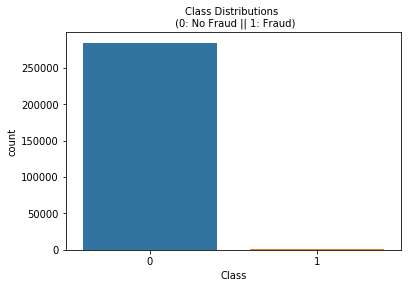

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(df['Class'])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=10)

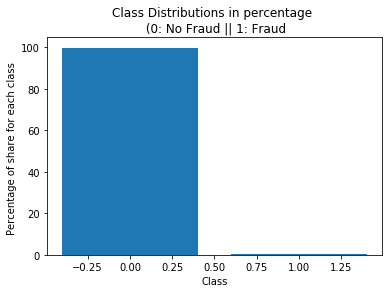

In [10]:
y_val = [normal_share, fraud_share]
x_val = [0,1]
plt.bar(x_val, y_val)
plt.xlabel("Class")
plt.ylabel("Percentage of share for each class ")
plt.title("Class Distributions in percentage \n (0: No Fraud || 1: Fraud")
plt.show()

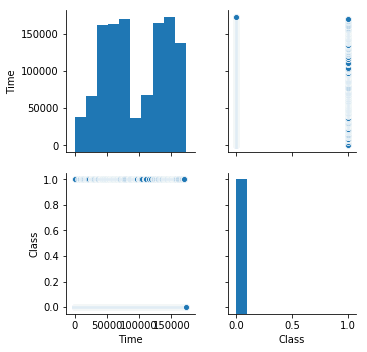

In [11]:
# Create a scatter plot to observe the distribution of classes with time
sns.pairplot(df, vars=["Time", "Class"])
plt.show()

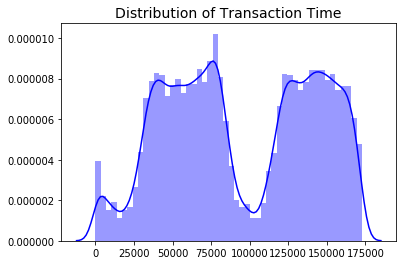

In [12]:
time_val = df['Time'].values

sns.distplot(time_val, color='b')
plt.title('Distribution of Transaction Time', fontsize=14)

plt.show()

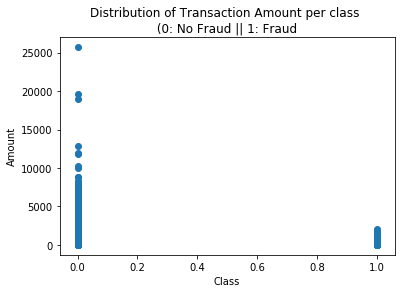

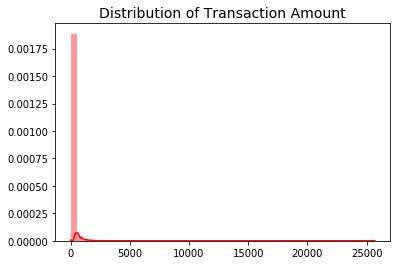

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter('Class', 'Amount', data=df)
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("Distribution of Transaction Amount per class \n (0: No Fraud || 1: Fraud ")
plt.show()

amount_val = df['Amount'].values

sns.distplot(amount_val, color='r')
plt.title('Distribution of Transaction Amount', fontsize=14)

plt.show()

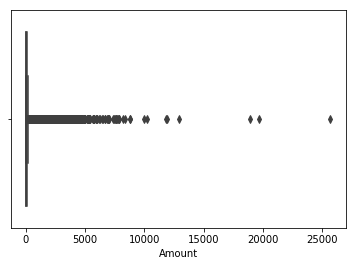

In [14]:
sns.boxplot(df['Amount'])

#### Standardizing the Amout field; Since it is having outliers; I am using RobustScaler which is less prone to outliers.

In [15]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [16]:
# Drop unnecessary columns
df = df.drop(["Time"], axis=1)

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### Splitting the data into train & test data

In [18]:
X= df.drop("Class",axis=1)
y= df["Class"]

In [19]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=101)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [20]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
348
144


### Plotting the distribution of a variable

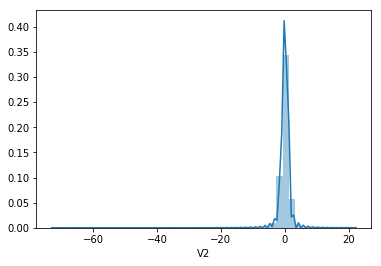

In [21]:
# plot the histogram of a variable from the dataset to see the skewness
# Checking on variable V2
sns.distplot(X_train["V2"])

###### from the above code; it clearly says, that dataset is highly skewed

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [22]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(copy=False)

pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [23]:
X_train_pt1 = pd.DataFrame(X_train_pt, columns=X_train.columns)
X_test_pt1 = pd.DataFrame(X_test_pt, columns=X_test.columns)

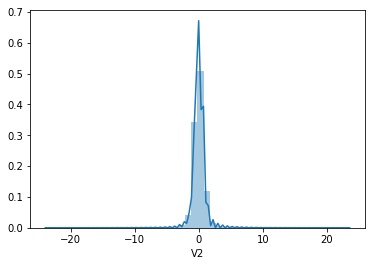

In [24]:
# plot the histogram of a variable from the dataset again to see the result 

# Checking on variable V2 again after fixing the skewness
sns.distplot(X_train_pt1["V2"])

## Model Building
- Build different models on the imbalanced dataset and see the result

In [25]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

num_C = 10  #--> list of values
cv_num = 5  #--> list of values

logmodel = linear_model.LogisticRegression(solver='liblinear', C=num_C, random_state=0)
logmodel.fit(X_train_pt1, y_train)
preds = logmodel.predict(X_test_pt1)

In [26]:
#AUC Score using logistics regression without any cross validation and with 10 variables
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.8193975505769899

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [23]:
#perform cross validation

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

crossval_scores = cross_val_score(logmodel, X_train_pt1, y_train, scoring='roc_auc', cv=folds)
print(crossval_scores)

print(len(X_train_pt1.columns))

#perform hyperparameter tuning
hyper_params = [{'n_features_to_select': list(range(4, 15))}]

logmodel2 = linear_model.LogisticRegression(solver='liblinear', random_state=0)
logmodel2.fit(X_train_pt1, y_train)
rfe = RFE(logmodel2)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        n_jobs=-1,
                        cv = folds, 
                        verbose = 5,
                        return_train_score=True)      

model_cv.fit(X_train_pt1, y_train)                  

[0.98316239 0.96510084 0.97844723 0.96553547 0.99178915]
29
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  9.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=0,
                                                        solver='liblinear',
                                        

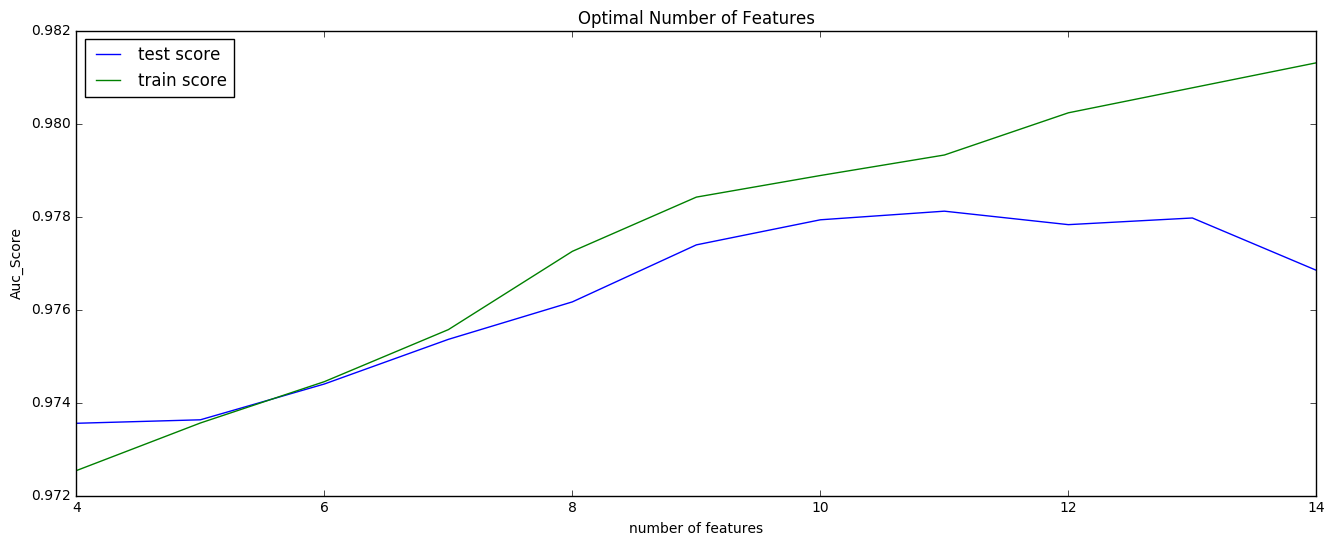

In [24]:
#print the evaluation result by choosing a evaluation metric
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('Auc_Score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [25]:
#print the optimum value of hyperparameters
# From the above Graph; number of features to be selected for better performance is 13 where Test and Train score both are on higher side

# final model
n_features_optimal = 13

logmodel_final = linear_model.LogisticRegression(solver='liblinear', random_state=0)
logmodel_final.fit(X_train_pt1, y_train)

rfe = RFE(logmodel_final, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train_pt1, y_train)

# predict labels of X_test
y_pred = logmodel_final.predict(X_test_pt1)
Auc_Score = roc_auc_score(y_test, y_pred)
print(Auc_Score)

0.8193975505769899


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [26]:
# Suggest not toi run the below KNN Algorithm; as it takes huge amount of time to execute.

#Using KNN method 
 from sklearn.neighbors import KNeighborsClassifier


k_range = range(1,11,2)
score1 = []
score2 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train_pt1, y_train)
    score1.append(knn.score(X_train_pt1,y_train))
    score2.append(knn.score(X_test_pt1,y_test))

In [27]:
plt.plot(k_range,score1,label="accuracy on training set")
plt.plot(k_range,score2,label="accuracy on test set")

plt.xlabel("value of k in KNN")
plt.ylabel("Accuracy")
plt.legend()


In [28]:
knn = KNeighborsClassifier(n_neighbors = 5,, n_jobs = -1)

scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
print(scores)
print(scores.mean())

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
# XG Boost
#---------------------------------
import xgboost
tree_range = range(2,30,5)
score1 = []
score2 = []
for tree in tree_range:
    xgb = xgboost.XGBClassifier(n_estimators=tree, random_state = 42, n_jobs = -1)
    xgb.fit(X_train_pt1,y_train)
    score1.append(xgb.score(X_train_pt1,y_train))
    score2.append(xgb.score(X_test_pt1,y_test))     

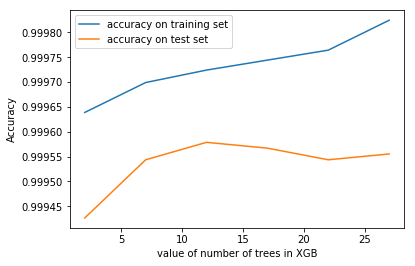

In [30]:
plt.plot(tree_range,score1,label="accuracy on training set")
plt.plot(tree_range,score2,label="accuracy on test set")
plt.xlabel("value of number of trees in XGB")
plt.ylabel("Accuracy")
plt.legend()

In [34]:
xgb = xgboost.XGBClassifier(n_estimators=22)

scores = cross_val_score(xgb, X_train_pt1,y_train, cv=5, scoring='roc_auc')
print(scores)
print(scores.mean())

[0.97797268 0.97875142 0.98670147 0.95547159 0.96150753]
0.9720809379485328


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [36]:
clf = xgboost.XGBClassifier(n_estimators=22)  #initialise the model with optimum hyperparameters
clf.fit(X_train_pt1, y_train)


scores = cross_val_score(xgb, X_test_pt1,y_test, cv=5, scoring='roc_auc')
print(scores)
print(scores.mean())

[0.99244452 0.99560274 0.89873267 0.96674133 0.96806823]
0.9643178967220771


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 27


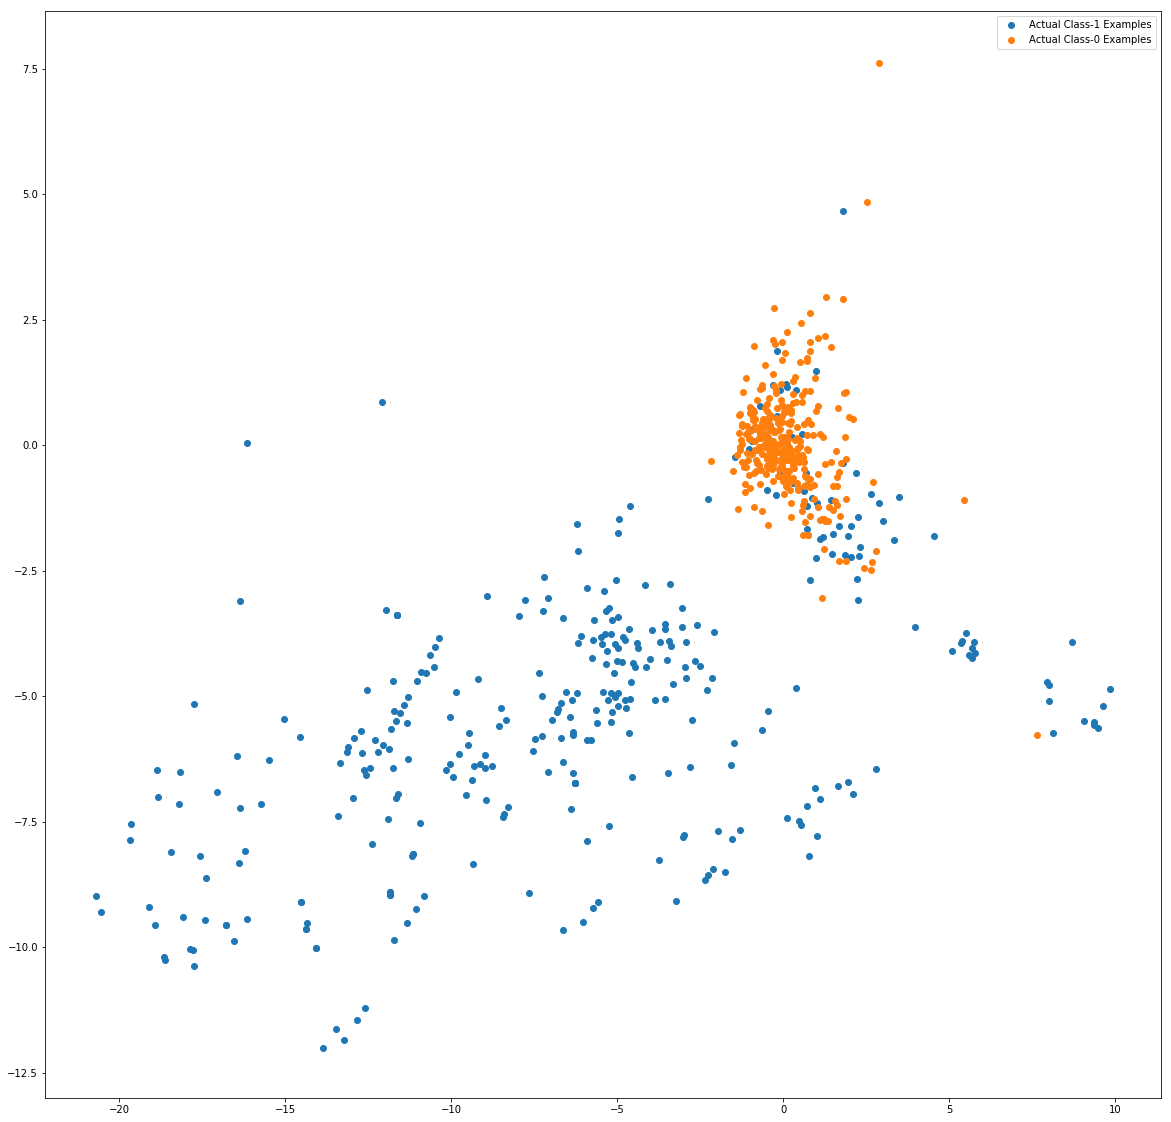

In [37]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [38]:
# Logistic Regression
from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

logmodel_b = linear_model.LogisticRegression(solver='liblinear', random_state=0)
logmodel.fit(X_train_pt1, y_train)
preds = logmodel.predict(X_test_pt1)

### Print the class distribution after applying ADASYN

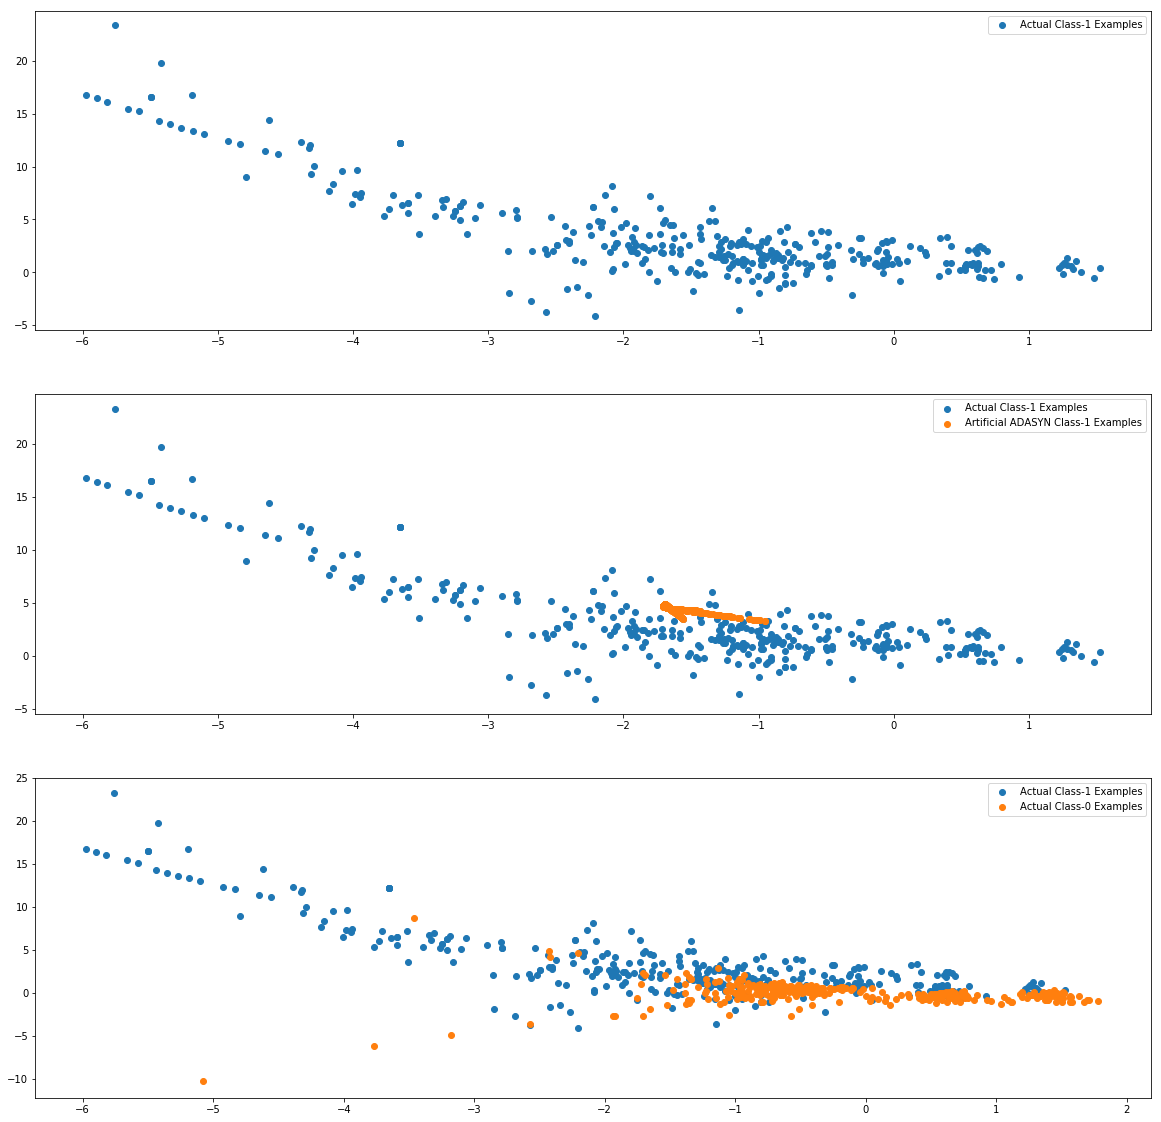

In [39]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt1, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train_pt1.shape[0]:]

X_train_1 = X_train_pt1.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt1.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

crossval_scores = cross_val_score(logmodel_b, X_train_adasyn, y_train_adasyn, scoring='roc_auc', cv=folds)
print(crossval_scores)

#perform hyperparameter tuning
hyper_params = [{'n_features_to_select': list(range(4, 15))}]

logmodel_b2 = linear_model.LogisticRegression(solver='liblinear', random_state=0)
logmodel_b2.fit(X_train_adasyn, y_train_adasyn)
rfe = RFE(logmodel_b2)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_adasyn, y_train_adasyn)                  

In [ ]:
#print the evaluation result by choosing a evaluation metric
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('Auc_Score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
#print the optimum value of hyperparameters
# From the above Graph; number of features to be selected for better performance is 13 where Test and Train score both are on higher side

# final model
n_features_optimal = 13

logmodel_final = linear_model.LogisticRegression(solver='liblinear', random_state=0)
logmodel_final.fit(X_train_adasyn, y_train_adasyn)

rfe = RFE(logmodel_final, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train_adasyn, y_train_adasyn)

# predict labels of X_test
y_pred = logmodel_final.predict(X_test_pt1)
Auc_Score = roc_auc_score(y_test, y_pred)
print(Auc_Score)

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Balancing and Oversampling the imbalance XGBoost

In [40]:
ada = over_sampling.ADASYN()
X_ada, y_ada = ada.fit_sample(X_train_pt1,y_train)
X_ada = pd.DataFrame(data = X_ada, columns = X_train_pt1.columns)
print(X_train_pt1.shape)
print(X_ada.shape)

(199364, 29)
(398097, 29)


In [41]:
# Initializing the model
xg_ada = xgboost.XGBClassifier(learning_rate = 0.8, reg_alpha = 0.8, reg_lambda = 0.8)

xg_ada1 = xg_ada.fit(X_ada, y_ada)
# Making predictions
y_pred_ag2 = xg_ada1.predict(X_test)

NameError: name 'accuracy_score' is not defined

In [48]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support

y_pred_ag_prob = xg_ada1.predict_proba(X_test)
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_ag2))

print("XGBoost:\n",confusion_matrix(y_test,y_pred_ag2))

fp_ag3, tp_ag3, thresholds = roc_curve(y_test, y_pred_ag_prob[: , 1], pos_label = 1)

prec_ag, rec_ag, f_ag,_ =  precision_recall_fscore_support(y_test, y_pred_ag2)
print("XGBoost : \nPrecision :", prec_ag, "Recall : ", rec_ag)

XGBoost - Accuracy -  0.999133925541004
XGBoost:
 [[85247    52]
 [   22   122]]
XGBoost : 
Precision : [0.99974199 0.70114943] Recall :  [0.99939038 0.84722222]


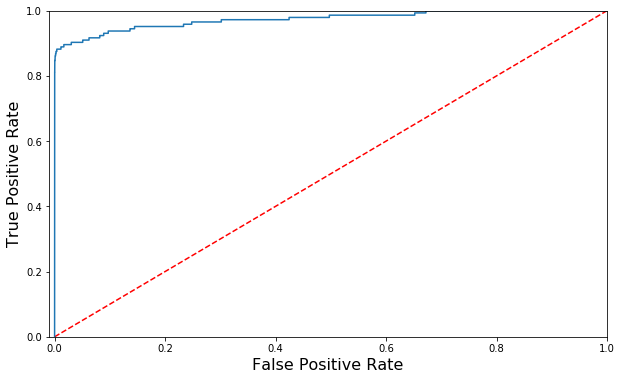

In [52]:
# ROC Curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
plt.plot(fp_ag3, tp_ag3, label = 'xgboost')

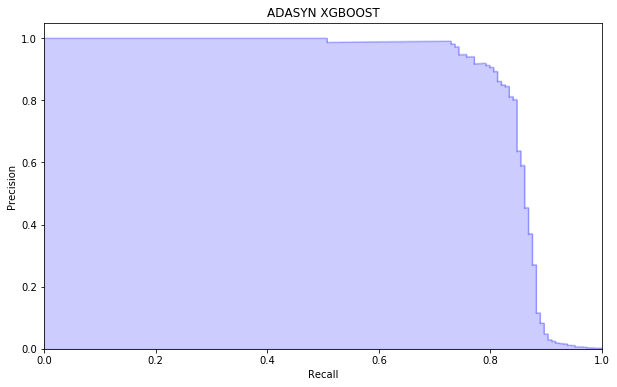

In [54]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve
fig = plt.figure(figsize=(10,6))
precision, recall, _ = precision_recall_curve(y_test, xg_ada1.predict_proba(X_test) [:, -1])
plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post' )
plt.fill_between(recall, precision, step = 'post', alpha = 0.2, color = 'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("ADASYN XGBOOST")
plt.show()